In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/car details v4.csv")

In [4]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [6]:
df.shape

(2059, 20)

In [ ]:
# Handle missing values
# Replace np.median with np.nanmedian to get the actual median value
df.fillna(df.select_dtypes(include=np.number).median().iloc[0], inplace=True)

In [7]:
df.isnull().sum()

,0
Make,0
Model,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Location,0
Color,0
Owner,0


In [8]:
# Feature Engineering
# Convert engine capacity to numeric.
df['Engine'] = df['Engine'].astype(str)
df['Max Power'] = df['Max Power'].astype(str)
df['Max Torque'] = df['Max Torque'].astype(str)
df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float)
df['Max Power'] = df['Max Power'].str.extract('(\d+\.?\d*)').astype(float)
df['Max Torque'] = df['Max Torque'].str.extract('(\d+\.?\d*)').astype(float)

In [9]:
df['Engine']

,Engine
0,1198.0
1,1248.0
2,1197.0
3,1197.0
4,2393.0
...,...
2054,2179.0
2055,814.0
2056,1196.0
2057,1995.0


In [10]:
df['Max Power']

,Max Power
0,87.0
1,74.0
2,79.0
3,82.0
4,148.0
...,...
2054,138.0
2055,55.0
2056,70.0
2057,188.0


In [11]:
df['Max Torque']

,Max Torque
0,109.0000
1,190.0000
2,112.7619
3,113.0000
4,343.0000
...,...
2054,330.0000
2055,75.0000
2056,102.0000
2057,400.0000


In [12]:
# Create age feature
current_year = 2023
df['Age'] = current_year - df['Year']

In [13]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns


# Correlation matrix of numerical features

# Brand value analysis

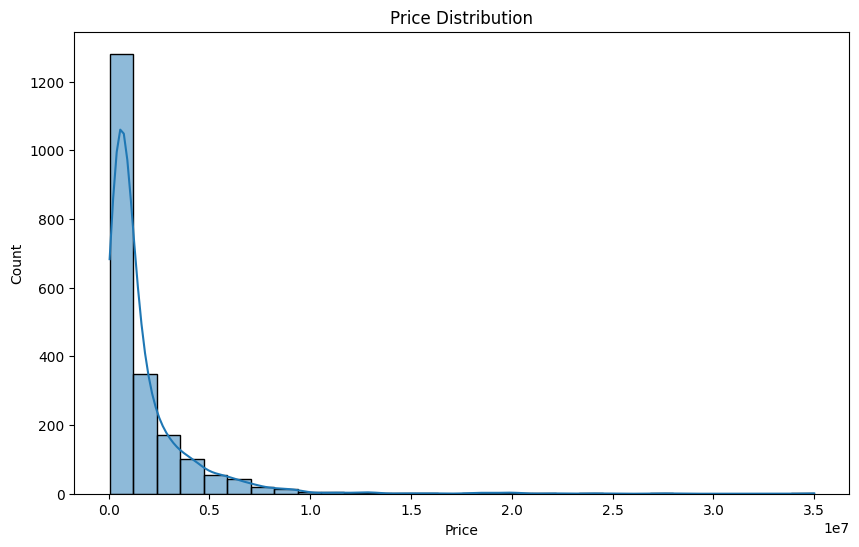

In [14]:
# Price distribution analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')

plt.show()

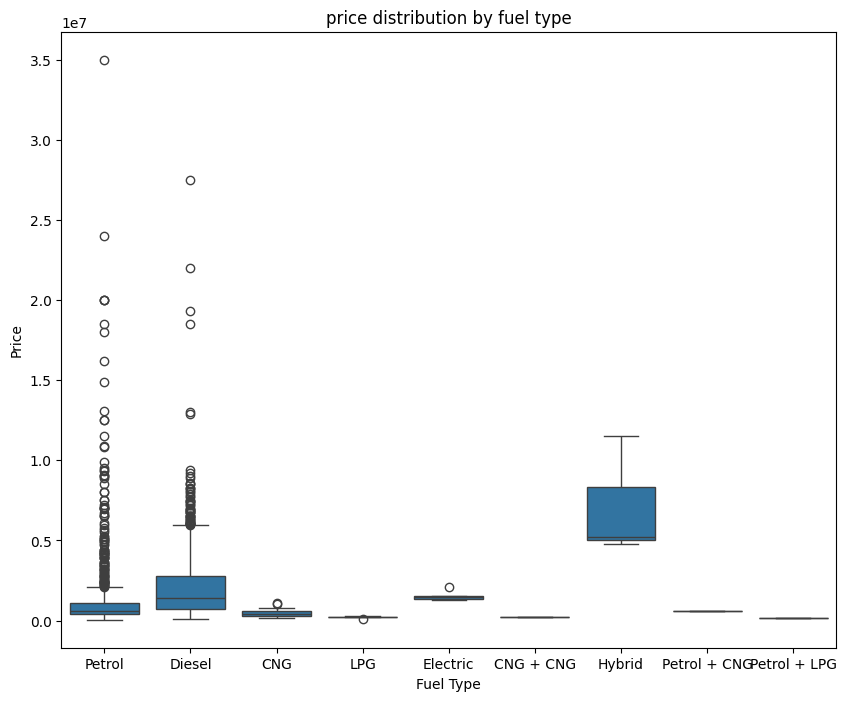

In [15]:
# Fuel type impact visualization
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x = "Fuel Type", y = "Price")
plt.xlabel = "Fuel Type"
plt.ylabel = "price"
plt.title("price distribution by fuel type")
plt.show()

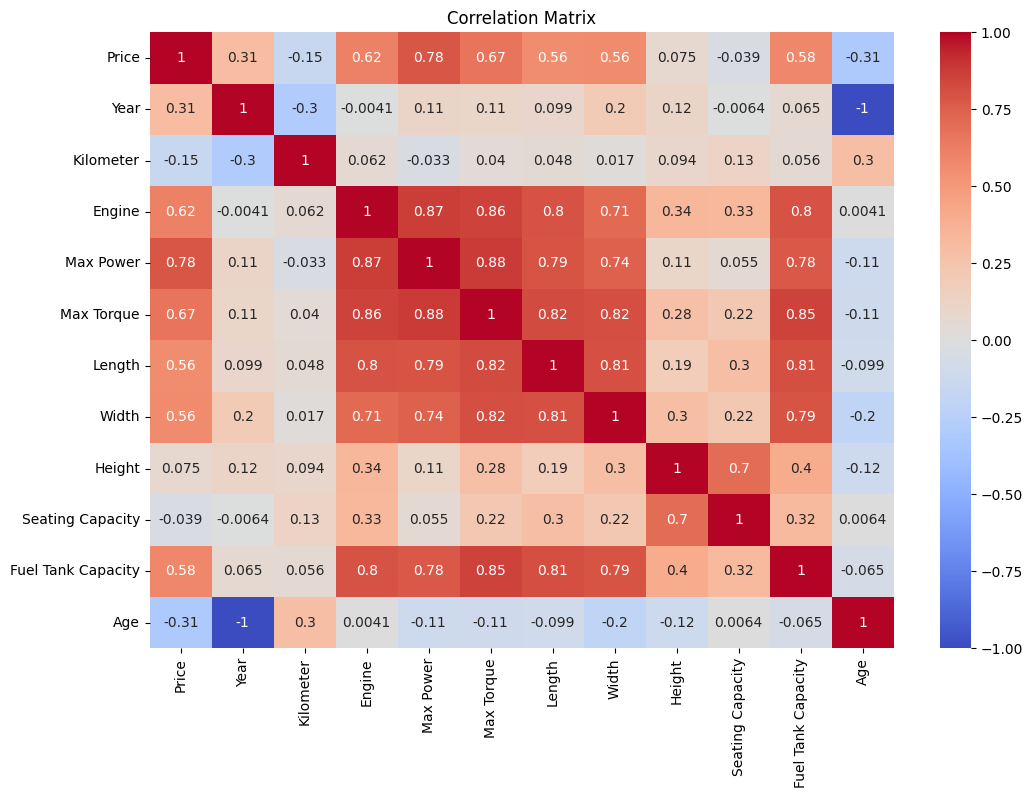

In [16]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

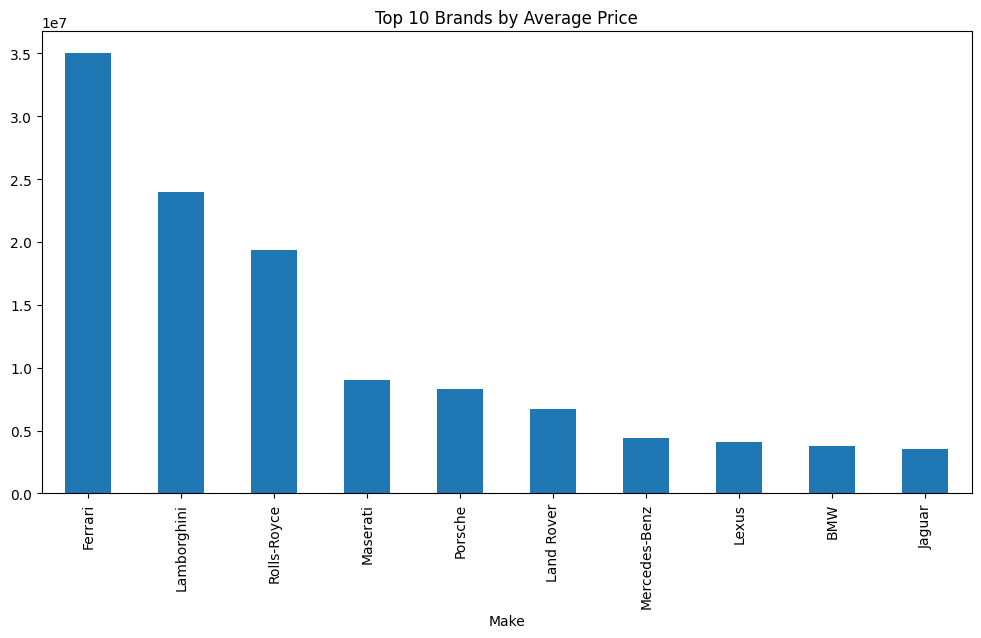

In [17]:
# Top 10 brands by average price
brand_price = df.groupby('Make')['Price'].mean().sort_values(ascending=False)[:10]
brand_price.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Brands by Average Price')
plt.show()

In [18]:
# Prepare data for modeling
X = df.drop(['Price', 'Model'], axis=1)  # Drop Model due to high cardinality
y = df['Price']

In [ ]:
X

,Make,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Age
0,Honda,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0,6
1,Maruti Suzuki,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0,9
2,Hyundai,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,12
3,Toyota,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0,4
4,Toyota,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179.0,138.0,330.0000,FWD,4585.0,1890.0,1785.0,7.0,70.0,7
2055,Hyundai,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814.0,55.0,75.0000,FWD,3495.0,1550.0,1500.0,5.0,32.0,9
2056,Ford,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196.0,70.0,102.0000,FWD,3795.0,1680.0,1427.0,5.0,45.0,10
2057,BMW,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995.0,188.0,400.0000,RWD,4936.0,1868.0,1479.0,5.0,65.0,5


In [19]:
y

,Price
0,505000
1,450000
2,220000
3,799000
4,1950000
...,...
2054,850000
2055,275000
2056,240000
2057,4290000


In [20]:
# Define categorical and numerical features
categorical_features = ['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain']
numerical_features = ['Year', 'Kilometer', 'Engine', 'Max Power', 'Max Torque',
                     'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Age']


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Create preprocessing pipeline
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.fillna(df.select_dtypes(include=np.number).median().iloc[0], inplace=True)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create a pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features), # Use numerical_transformer instead of col
        ('cat', categorical_transformer, categorical_features)])


In [22]:
from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Create and train model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Kilometer',
                                                   'Engine', 'Max Power',
                                                   'Max Torque', 'Length',
                                                   'Width', 'Height',
                                                   'Seating Capacity',
                                                   'Fuel Tank Capacity',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Fuel Type',
                                                   'Transmission', 'Location',
                                                   'Color', 'Owner',
                                                   'Seller Type',
                                                   'Drivetrain'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [25]:
# Evaluate model
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R² Score: {r2_score(y_test, y_pred)}')

MAE: 303117.2489212514
R² Score: 0.8626184272207372


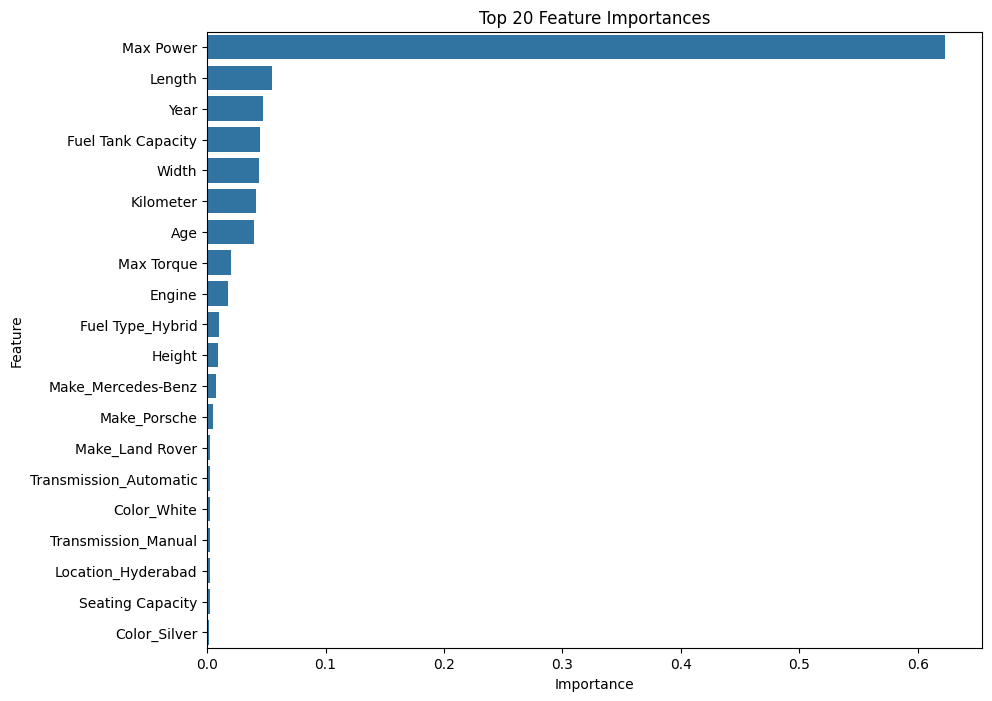

In [28]:
# Feature Importance
rf = model.named_steps['regressor']
onehot_columns = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(onehot_columns)

importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Top 20 Feature Importances')
plt.show()

In [29]:
# Business Insights
# 1. Price Distribution by Brand
top_brands = df.groupby('Make')['Price'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Premium Brands:")
print(top_brands)


Top 5 Premium Brands:
Make
Ferrari        3.500000e+07
Lamborghini    2.400000e+07
Rolls-Royce    1.933333e+07
Maserati       9.000000e+06
Porsche        8.342667e+06
Name: Price, dtype: float64


In [30]:
# 2. Fuel Type Analysis
fuel_analysis = df.groupby('Fuel Type')['Price'].agg(['mean', 'count'])
print("\nFuel Type Analysis:")
print(fuel_analysis)



Fuel Type Analysis:
                      mean  count
Fuel Type                        
CNG           4.453800e+05     50
CNG + CNG     2.490000e+05      1
Diesel        2.101848e+06   1049
Electric      1.497857e+06      7
Hybrid        7.166667e+06      3
LPG           2.100000e+05      5
Petrol        1.322041e+06    942
Petrol + CNG  5.750000e+05      1
Petrol + LPG  1.300000e+05      1


In [31]:
# 3. Transmission Impact
transmission_impact = df.groupby('Transmission')['Price'].mean()
print("\nTransmission Impact on Price:")
print(transmission_impact)


Transmission Impact on Price:
Transmission
Automatic    2.979057e+06
Manual       6.600644e+05
Name: Price, dtype: float64


In [32]:
# 4. Age vs Price Correlation
age_price_corr = df[['Age', 'Price']].corr().iloc[0,1]
print(f"\nAge-Price Correlation: {age_price_corr:.2f}")


Age-Price Correlation: -0.31


In [33]:
# 5. Location-based Pricing
location_pricing = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
print("\nLocation-based Average Pricing:")
print(location_pricing.head())


Location-based Average Pricing:
Location
Ghaziabad     3.156667e+06
Chennai       2.992048e+06
Surat         2.980400e+06
Chandigarh    2.920500e+06
Karnal        2.762692e+06
Name: Price, dtype: float64
